## Accident by state

In [2]:
import pandas as pd
import numpy as np
from google.cloud import bigquery

#Extract the data from bigquery
client = bigquery.Client(project='phydata-desafio1')
QUERY2 = """
SELECT
  state_name,
  AVG(latitude) AS avg_latitude,
  AVG(longitude) AS avg_longitude,
  COUNT(*) AS num_accidents
FROM
  `phydata-desafio1.nhtsa_traffic_fatalities.accident_2015`
GROUP BY
  state_name
ORDER BY
  num_accidents DESC
LIMIT
  15
  """
query_job = client.query(QUERY2)  # API request
results = query_job.result()  # Waits for query to finish
data_frame = results.to_dataframe()
name_database = 'state_name_accidents' # Name of the database
data_frame.to_csv(name_database + '.csv', index=False) #Save the data in a csv file

In [ ]:
# Interactive map accidents by state

import folium
import pandas as pd

# Ejemplo de datos con longitud, latitud y número de accidentes

df = pd.read_csv('state_name_accidents.csv')

# Crear un mapa centrado en una ubicación inicial
m = folium.Map(location=[df['avg_latitude'].mean(), df['avg_longitude'].mean()], zoom_start=5)

# Agregar marcadores para cada ubicación con información de accidentes
for index, row in df.iterrows():
    popup_content = f"Nombre: {row['state_name']}<br>Accidents: {row['num_accidents']}"
    folium.Marker([row['avg_latitude'], row['avg_longitude']], popup=popup_content).add_to(m)

# Mostrar el mapa interactivo
m.save('mapa_con_accidentes.html')

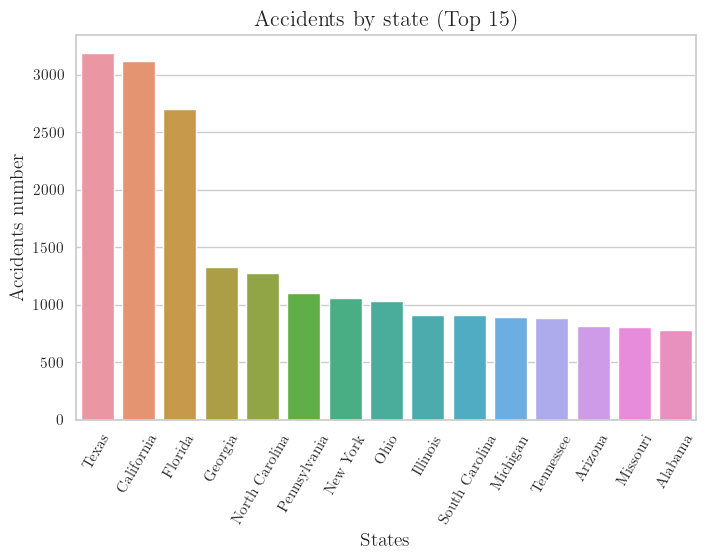

In [4]:
# Accident number by state (Top 15)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('state_name_accidents.csv')
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.barplot(x='state_name', y='num_accidents', data=df)

# Etiquetas y título
plt.xlabel(r'States',fontdict={'fontsize': 14})
plt.ylabel(r'Accidents number',fontdict={'fontsize': 14})
plt.title(r'Accidents by state (Top 15)',fontdict={'fontsize': 16})

# Rotar etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=60)

# Mostrar el gráfico
plt.show()
